In [2]:
from FR3Py.vision.cameras import RealSenseCamera
camera = RealSenseCamera(VGA=False, enable_imu=False, enable_ir=True, emitter_enabled=True, align_to_color=False)

Enabling streams for camera:  141322250720


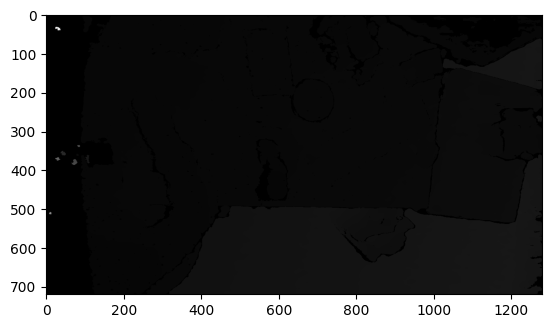

In [3]:
import matplotlib.pyplot as plt
camera.grab_frames()
plt.imshow(camera.depth_frame,cmap='gray')

In [7]:
from FR3Py.trackers import ApriltagTracker  

ext_params = camera.getExtrinsics()
int_params = camera.getIntrinsics()
K, D = int_params['IR1']['K'], int_params['IR1']['D']
tracker = ApriltagTracker(tag_size=0.172, intrinsic_matrix=K, distortion_coeffs=D)
tracker.process(camera.ir1_frame)
tracker.getAllTags()

{}

In [8]:
from FR3Py.trackers import ApriltagTracker   
K, D = int_params['RGB']['K'], int_params['RGB']['D']
tracker = ApriltagTracker(tag_size=0.172, intrinsic_matrix=K, distortion_coeffs=D)
tracker.process(camera.color_frame)
tracker.getAllTags()

{}

In [9]:
camera.close()